In [5]:
import os
import pandas as pd

In [10]:
#Make a list of all files in directory that end with 'output.txt'
path = 'C:/Users/sneha/Documents/LearningPython'
outputs = [f for f in os.listdir(path) if (f.endswith('output.txt')]
# check = outputs[0:3]
# print(check)
# print(len(outputs))

In [8]:
def file_to_df(file_name):
    #Add file name to the path so we can find the file in the folder
    file_path = path + '/' + file_name
    file1 = open(file_path)
    
    #Put everything in the file in a list
    file_output = file1.readlines()
    
    #Initialize a new list
    curves = []
    
    #Go through the file and put each row of the file (a, b, splits, rank) into the list 'curves'
    for row in file_output:
        if row[0] == '*':
            curves.append(row.strip('* '))
            
    #Save the information at the end of the file about memory usage and time to compute
    last_line = file_output[-1].split()
    time_to_compute = float(last_line[2])
    memory_in_MB = float(last_line[-1].strip('MB'))
    
    #Each entry in curves is a string 'a b splits rank'. To have these as separate columns,
    #we need each to be a list. 
    
    curves_for_df = []
    for curve in curves:
        curves_for_df.append(curve.split(' '))
    
    #Remove the \n from the last entry
    for curve in curves_for_df:
        curve[3] = curve[3][0]
    
    #Create a Pandas dataframe with this info
    df = pd.DataFrame(curves_for_df, columns = ['a', 'b', 'Number of splits', 'Rank'])
    
    file1.close()
    #Return the data frame, time_to_compute, memory_in_MB
    return df, time_to_compute, memory_in_MB
    
# print(file_to_df(outputs[0]))
            
#Do this for every file! Note: Edit to make this do it for multiple files at once. 
all_files_to_df = list(map(file_to_df, outputs))
# print(all_files_to_df[0:3])

#Combine dataframes from each to one large dataframe. This is yucky and there's probably a better way to do it, but it works.
a = []
b = []
splits = []
ranks = []
for file in all_files_to_df:
    df_file = file[0]
    a_file = df_file['a'].tolist()
    b_file = df_file['b'].tolist()
    splits_file = df_file['Number of splits'].tolist()
    rank_file = df_file['Rank'].tolist()
    for n in a_file:
        a.append(n)
    for n in b_file:
        b.append(n)
    for n in splits_file:
        splits.append(n)
    for n in rank_file:
        ranks.append(n)
        
data = {'a': a, 'b': b, 'Number of splits': splits , 'Rank': ranks}

df = pd.DataFrame(data)

# print(df)

df.to_csv('elliptic_curve_data.csv', index=False) 


KeyboardInterrupt: 

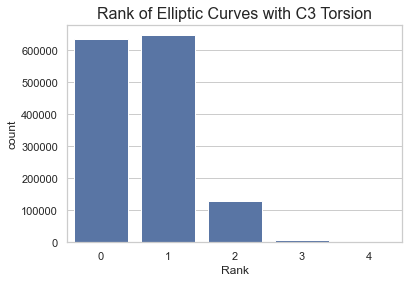

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Read in the data from the csv file
curve_data = pd.read_csv('elliptic_curve_data.csv')

# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Rank of Elliptic Curves with C3 Torsion', fontsize=16)

# plots a vertical bar chart
sns.countplot(x='Rank', color="b", data=curve_data);

# saves the image
plt.savefig("all_ranks.png")

# shows the image
plt.show()



In [ ]:
#Plot ranks for specific numbers of split primes 

#If there are exactly 0 splits:

# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Ranks of Curves with 0 Splits', fontsize=16)

#Selects only the rows with 0 split:
zero_split = curve_data[curve_data['Number of splits']==0]

# plots a vertical bar chart
sns.countplot(x='Rank', color="b", data=zero_split);

# saves the image
plt.savefig("zero_splits.png")

# shows the image
plt.show()

In [ ]:
print(curve_data['a'].max())
print(curve_data['a'].min())
print(curve_data['b'].max())
print(curve_data['b'].min())

In [ ]:
for a:= -1099 to 1099 do
for b:=1 to 1199 do
if (a^3*b^3-27*b^4) ne 0 then
E:=EllipticCurve([a,0,b,0,0]);
B:=BadPrimes(E);
additives:=0;
nonsplits :=0;
for i:=1 to #B do
if ReductionType(E,B[i]) eq "Additive" then
additives :=additives+1;
if ReductionType(E,B[i]) eq "Nonsplit multiplicative" then
nonsplits :=nonsplits+1;
end if;
end if;
end for;
print "*",a,b,additives, nonsplits;
end if;
end for;
end for;
quit;

In [9]:
somethings_wrong = zero_split[zero_split['Rank']==2]
print(somethings_wrong)

           a     b  Number of splits  Rank
18         0    19                 0     2
29         0    30                 0     2
36         0    37                 0     2
2448       0  1001                 0     2
2455       0  1008                 0     2
...      ...   ...               ...   ...
1376008 -910    65                 0     2
1376579 -999    37                 0     2
1383473 -960   180                 0     2
1385494 -969    51                 0     2
1385983 -960    90                 0     2

[405 rows x 4 columns]


In [14]:
#Make a list of the all the a and b values of curves with 0 splits and rank 2:

#Is the rank bounded by the number of additive primes? 

a_rank_2 = somethings_wrong['a'].tolist()
print(a_rank_2)

b_rank_2 = somethings_wrong['b'].tolist()
print(b_rank_2)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 126, 114, 124, 105, 102, 124, 130, 110, 171, 186, 182, 220, 240, 201, 210, 204, 218, 248, 273, 290, 285, 260, 260, 342, 342, 309, 335, 340, 348, 325, 325, 396, 374, 430, 426, 440, 407, 446, 456, 453, 462, 513, 504, 528, 513,

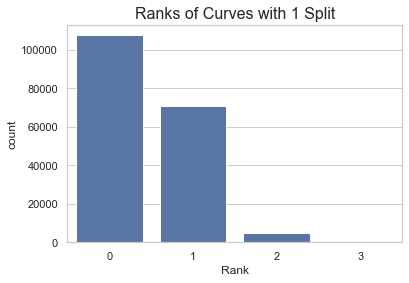

In [7]:
#If there are exactly 1 splits:

# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Ranks of Curves with 1 Split', fontsize=16)

#Selects only the rows with 0 split:
one_split = curve_data[curve_data['Number of splits']==1]
# plots a vertical bar chart
sns.countplot(x='Rank', color="b", data=one_split);

# saves the image
plt.savefig("one_splits.png")

# shows the image
plt.show()

In [10]:
test = one_split[one_split['Rank']==3]
print(test)

           a    b  Number of splits  Rank
146315   130  325                 1     3
179909   102  969                 1     3
220828   172  688                 1     3
473358   455   65                 1     3
536268    65  325                 1     3
549829    86   86                 1     3
552513    90  570                 1     3
558346    57  703                 1     3
601259   566  566                 1     3
635858   660  165                 1     3
661725   728  182                 1     3
784801  -102  408                 1     3
788413  -130  520                 1     3
818783  -171   19                 1     3
825725  -182  182                 1     3
826215  -172  172                 1     3
878224  -231  231                 1     3
878371  -228  228                 1     3
878665  -222  222                 1     3
897763  -240  570                 1     3
927733  -290  290                 1     3
927880  -287  287                 1     3
963063  -333   37                 

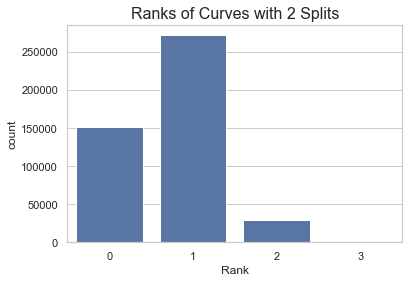

In [11]:
#If there are exactly 2 splits:

# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Ranks of Curves with 2 Splits', fontsize=16)

#Selects only the rows with 0 split:
two_split = curve_data[curve_data['Number of splits']==2]
# plots a vertical bar chart
sns.countplot(x='Rank', color="b", data=two_split);

# saves the image
plt.savefig("two_splits.png")

# shows the image
plt.show()

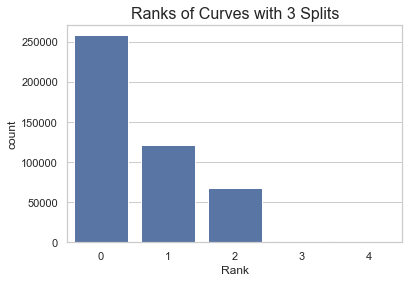

In [17]:
#If there are exactly 3 splits:

# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Ranks of Curves with 3 Splits', fontsize=16)

#Selects only the rows with 0 split:
three_split = curve_data[curve_data['Number of splits']==3]
# plots a vertical bar chart
sns.countplot(x='Rank', color="b", data=three_split);

# saves the image
plt.savefig("three_splits.png")

# shows the image
plt.show()

In [13]:
test = two_split[two_split['Rank']==3]
print(test)

           a     b  Number of splits  Rank
5257       6   111                 2     3
6606      33   111                 2     3
9578      42  1083                 2     3
9872      48  1077                 2     3
12814      7  1169                 2     3
...      ...   ...               ...   ...
1364738 -936     9                 2     3
1367197 -936   104                 2     3
1367646 -927   103                 2     3
1376209 -906    66                 2     3
1384984 -980    91                 2     3

[795 rows x 4 columns]


In [17]:
three_split = curve_data[curve_data['Number of splits']==3]
rank4_3splits = three_split[three_split['Rank']==4]
print(rank4_3splits)
print('Number of curves:', rank4_3splits.shape[0])
prob_eq_bound =  rank4_3splits.shape[0] / three_split.shape[0]
print('Probability that curves with 3 splits equal the bound:', prob_eq_bound)

           a     b  Number of splits  Rank
49931     49   791                 3     4
59409     39   969                 3     4
137167   147  1077                 3     4
325747   273   807                 3     4
358521   329   581                 3     4
390843   377   403                 3     4
430243   416   403                 3     4
552574    91   581                 3     4
571866    77   973                 3     4
635852   660   159                 3     4
707503   846   210                 3     4
805506  -138   813                 3     4
888650  -222   407                 3     4
908934  -217   791                 3     4
974742  -349   349                 3     4
1062485 -442   442                 3     4
1204612  -96   969                 3     4
1377094 -988    13                 3     4
Number of curves: 18
Probability that curves with 3 splits equal the bound: 3.9995289443687746e-05


In [14]:
rank4_curves = curve_data[curve_data['Rank']==4]
print(rank4_curves)

           a     b  Number of splits  Rank
49931     49   791                 3     4
59409     39   969                 3     4
137167   147  1077                 3     4
141657   137   217                 5     4
144121   136   281                 5     4
...      ...   ...               ...   ...
1204612  -96   969                 3     4
1282808 -679   415                 5     4
1341938 -844   295                 7     4
1368306 -914   113                 5     4
1377094 -988    13                 3     4

[76 rows x 4 columns]


In [21]:
curve_data['Rank'].max()

4